In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.4
lumiTextOffset   = 0.2

cmsTextSize      = 0.45
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "59.7 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.11)
tdrStyle.SetPadRightMargin(0.11)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [156]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.0)
    h3.SetMaximum(2.10)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3


## Fake lepton plot

- [Fake Rate](#Fake-Rate)
- [Apply Weight](#Apply-Weight)
- [Closure Test](#Closure-Test)

In [ ]:
plt.style.use(hep.style.CMS)
# import matplotlib as mpl
# mpl.style.use(hep.style.CMS)

In [5]:
@numba.njit
def sgn(num):
    if (num >= 0):
        return 1
    else:
        return -1

In [ ]:
# len(branches['gen_weight'])
# true_events = file['nEventsGenWeighted'].values()[0]

### Prescale HLT

#### Prescale

In [ ]:
def GetHist_Prescale(file, hist, isData):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['dilepton_mass','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['dilepton_mass','gen_weight','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight = (1000*lumi*xsec) / true_events
    
    mll_cut1 = branches.loc[:,'dilepton_mass'] > 60
    mll_cut2 = branches.loc[:,'dilepton_mass'] < 120
    
    HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
    HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
    HLT_cut3 = branches.loc[:,'HLT_IsoMu24'] == True
    
    arrays = branches.loc[mll_cut1 & mll_cut2 & HLT_cut1,:]
    
    if isData:
        for i in trange(0, len(arrays['dilepton_mass']), desc=f'fill mll for: {file}'):
            hist.Fill(float(arrays['dilepton_mass'].values[i]))
    else:
        for i in trange(0, len(arrays['dilepton_mass']), desc=f'fill mll for: {file}'):
            hist.Fill(float(arrays['dilepton_mass'].values[i]),weight*sgn(arrays['gen_weight'].values[i]))
        
        
def Cal_Prescale_Factor(hist_DY, hist_DATA):
    
    # calculating sum sqrt error to get prescale factor
    SSE = float('inf')
    Prescale_Factor = 1
    for i in trange(0, 10000, 100):
        for j in trange(0, hist_DATA.GetNbinsX()):
            SSE_temp = np.square(hist_DATA.GetBinContent(j+1)-hist_DY.GetBinContent(j+1)) * hist_DATA.GetBinContent(j+1)
            if SSE_temp < SSE:
                SSE = SSE_temp
                Prescale_Factor = i
    print(f"Prescale_Factor: {Prescale_Factor}")
    return Prescale_Factor

In [ ]:
xbins = 60
xlow = 60
xup = 120

hist_DY_prescale = ROOT.TH1F("","",xbins,xlow,xup)
hist_DATA_prescale = ROOT.TH1F("","",xbins,xlow,xup)

file_DY_prescale = [
    '/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018.root',
]

file_DATA_prescale = [
    '/eos/user/s/sdeng/WZG_analysis/DY_test/',
]

for file in file_DY_prescale:
    GetHist_Prescale(file_DY_prescale, hist_DY_prescale, 0)
for file in file_DATA_prescale:
GetHist_Prescale(file_DATA_prescale, hist_DATA_prescale, 1)

Prescale_Factor = Cal_Prescale_Factor(hist_DY_prescale, hist_DATA_prescale)

In [ ]:
def SetHistStyle_prescale(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('#M_ll [GeV]')
    hist.SetStats(0)
    
c1 = ROOT.TCanvas("","",1000,800)

hist1 = hist_DY_prescale.Clone()
hist2 = hist_DATA_prescale.Clone()

SetHistStyle_prescale(hist1, 2)
SetHistStyle_prescale(hist2, 0)

c1.Draw()
hist1.Draw("HIST")
hist2.Draw("ep SAME")

#### Validation

In [6]:
def AddHist_Prescale_valid(file, hist_pre1, hist_pre2, hist, hist_mu24):
    
#     branches = uproot.open(file+':Events').arrays(['mt','met','lepton_pt','lepton_pfRelIso04_all','lepton_pdgid','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
#     branches = uproot.open(file+':Events').arrays(['dilepton_mass','lepton1_pt','lepton1_pdgId','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
    branches = uproot.open(file+':Events').arrays(['HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    
#     HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
#     HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
#     HLT_cut3 = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut3 = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    pf_cut = branches.loc[:,'is_lepton_tight'] == 1
    
#     pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.4
#     mll_cut1 = branches.loc[:,'dilepton_mass'] > 60
#     mll_cut2 = branches.loc[:,'dilepton_mass'] < 120
    lepton_cut = abs(branches.loc[:,'lepton_pdgid']) == 11
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    mt_cut = branches.loc[:,'mt'] < 20
    met_cut = branches.loc[:,'met'] < 20
#     lepton_cut = abs(branches.loc[:,'lepton1_pdgId']) == 13
#     pt_edge = branches.loc[:,'lepton1_pt'] < 25
    
    arrays_pre1 = branches.loc[ HLT_cut1 & lepton_cut & pf_cut & mt_cut & met_cut,:]
    arrays_pre2 = branches.loc[ HLT_cut2 & lepton_cut & pf_cut & mt_cut & met_cut,:]
#     arrays_mu24 = branches.loc[HLT_cut3 & lepton_cut & pf_cut & mt_cut & met_cut,:]
    arrays = branches.loc[ lepton_cut & pf_cut & mt_cut & met_cut, :]
    
    for i in trange(0, len(arrays_pre1['lepton_pt']), desc=f'fill GeV region for HLT_Mu8_TrkIsoVVL in {file}'):
        hist_pre1.Fill(float(arrays_pre1['lepton_pt'].values[i]))
    for i in trange(0, len(arrays_pre2['lepton_pt']), desc=f'fill GeV region for HLT_Mu17_TrkIsoVVL in {file}'):
        hist_pre2.Fill(float(arrays_pre2['lepton_pt'].values[i]))
#     for i in trange(0, len(arrays_mu24['lepton_pt']), desc=f'fill for HLT_IsoMu24 in {file}'):
#         hist_mu24.Fill(float(arrays_mu24['lepton_pt'].values[i]))
    for i in trange(0, len(arrays['lepton_pt']), desc=f'fill for No HLT in {file}'):
        hist.Fill(float(arrays['lepton_pt'].values[i]))
    
    print("DONE")
    
    return True

In [7]:
xbins = 200
xlow = 0
xup = 200

hist_pre1 = ROOT.TH1F("","",xbins,xlow,xup)
hist_pre2 = ROOT.TH1F("","",xbins,xlow,xup)
hist = ROOT.TH1F("","",xbins,xlow,xup)
hist_mu24 = ROOT.TH1F("","",xbins,xlow,xup)

hist_pre1.Sumw2()
hist_pre2.Sumw2()
hist.Sumw2()
hist_mu24.Sumw2()

filelist_prescale_valid = [
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017D.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017E.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017F.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018D.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2016.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2016C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/test_diff_reco/SingleMuon_Run2016C-UL2016_MiniAODv1_NanoAODv2-v1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part2.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part3.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-14Sep2018_ver2-v1_part1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018D.root",
]

for file in filelist_prescale_valid:
    AddHist_Prescale_valid(file, hist_pre1, hist_pre2, hist, hist_mu24)


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 1018/1018 [00:05<00:00, 180.87it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 1685/1685 [00:00<00:00, 147026.20it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 2570692/2570692 [00:14<00:00, 172019.56it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 2324/2324 [00:00<00:00, 131916.34it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 1776/1776 [00:00<00:00, 155617.20it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 1258250/1258250 [00:07<00:00, 170372.66it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 2294/2294 [00:00<00:00, 142819.26it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 1882/1882 [00:00<00:00, 150410.25it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 1237157/1237157 [00:06<00:00, 180408.97it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 3560/3560 [00:00<00:00, 173808.59it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 2896/2896 [00:00<00:00, 177479.61it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 2284118/2284118 [00:13<00:00, 174283.69it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 3118/3118 [00:00<00:00, 150579.62it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 2489/2489 [00:00<00:00, 145579.10it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 1940030/1940030 [00:11<00:00, 175114.00it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 4512/4512 [00:00<00:00, 143667.15it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 3420/3420 [00:00<00:00, 144952.70it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 2888173/2888173 [00:16<00:00, 176879.71it/s]


DONE


59.7 fb^{-1} (13 TeV)


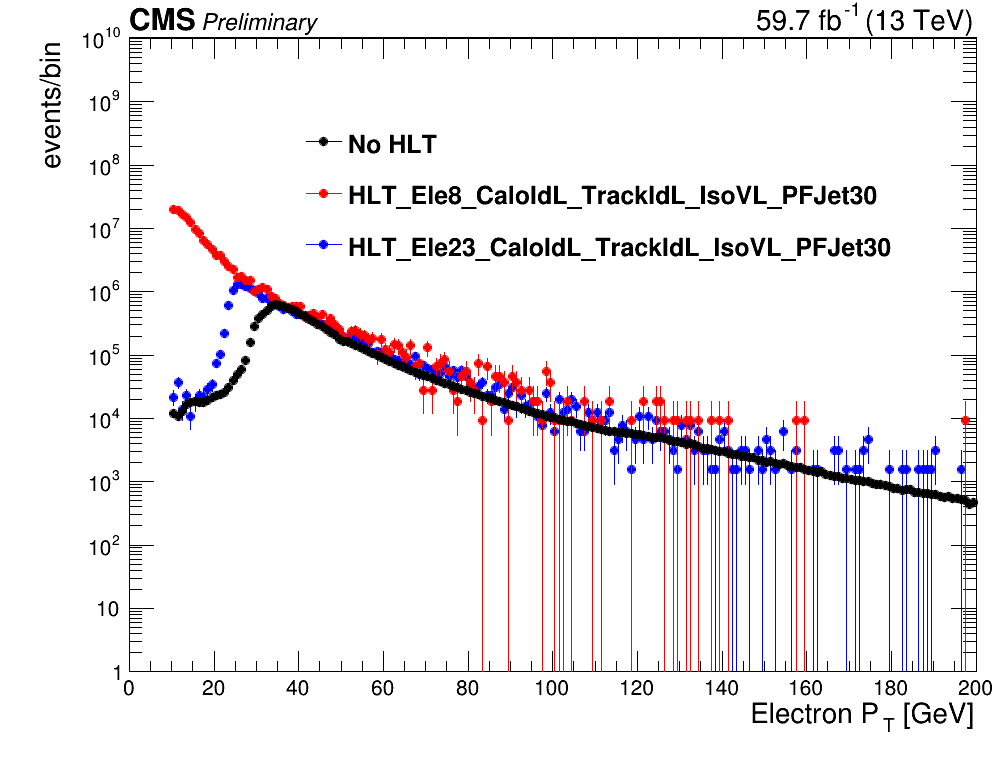

In [9]:
def SetHistStyle_prescale_valid(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetLineColor(color)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('Electron P_{T} [GeV]')
    hist.SetStats(0)
    
c1 = ROOT.TCanvas("","",1000,800)

SetHistStyle_prescale_valid(hist, 1)
SetHistStyle_prescale_valid(hist_mu24, 11)
SetHistStyle_prescale_valid(hist_pre1, 2)
SetHistStyle_prescale_valid(hist_pre2, 4)

hist_pre1_clone = hist_pre1.Clone()
hist_pre2_clone = hist_pre2.Clone()
hist_clone = hist.Clone()
hist_mu24_clone = hist_mu24.Clone()
# hist_pre1_clone.Scale(59.7/0.00856)
# hist_pre2_clone.Scale(59.7/0.04578)
# hist_pre1_clone.Scale(36.9/0.00780)
# hist_pre2_clone.Scale(36.9/0.21675)

hist_pre1_clone.Scale(59.7/0.00641)
hist_pre2_clone.Scale(59.7/0.03891)
# hist_pre1_clone.Scale(41.54/0.00397)
# hist_pre2_clone.Scale(41.54/0.04347)

c1.Draw()
hist_pre2_clone.Draw("pe SAME")
hist_pre1_clone.Draw("SAME pe")
hist_clone.Draw("pe SAME")
# hist_mu24_clone.Draw("pe SAME")

hist_pre2_clone.SetMinimum(1)
# hist_pre2_clone.SetMaximum(hist_pre2_clone.GetMaximum()*1.8)
hist_pre2_clone.SetMaximum(10000000000)
# hist_pre2_clone.SetMaximum(hist_pre2_clone.GetMaximum()*1.8)
# Line = ROOT.TLine(25, c1.GetUymin(), 25, hist_pre2_clone.GetMaximum())
# Line = ROOT.TLine(25, c1.GetUymin(), 25, hist_mu24_clone.GetMaximum()*1.0)
# Line.SetLineStyle(2)
# Line.Draw("SAME")
# Line.Print()

legend = ROOT.TLegend(0.30, 0.65, 0.50, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(hist,'No HLT')
# legend.AddEntry(hist_mu24,'HLT_IsoMu24')
legend.AddEntry(hist_pre1,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30')
legend.AddEntry(hist_pre2,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30')
legend.Draw("SAME")

ROOT.gPad.SetLogy()
# ROOT.gPad.SetGrid()
CMS_lumi(c1, 0, 0)
# c1.SaveAs('Fake_Lepton/PreScale_valid_Mu_addfactor_2018.pdf')
# c1.SaveAs('Fake_Lepton/PreScale_valid_Mu_addfactor_2018.png')

### Fake Template distribution

In [239]:
def AddHist_FTdist(file, branch, hist_pre1, hist_pre2, isData, xsec):
    
    if isData:
        print('is Data')
        init_branches = ['is_lepton_tight','jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all',\
                                                       'HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt',\
                                                      'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30']
        if not (branch in init_branches):
            init_branches.append(branch)
        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
#         branches = uproot.open(file+':Events').arrays(['jet_pt','HLT_Ele32_WPTight_Gsf','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    else:
        print('is MC')
        init_branches = ['is_lepton_tight','jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','lepton_gen_matching','gen_weight',\
                                                       'HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt',\
                                                      'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30']
        if not (branch in init_branches):
            init_branches.append(branch)
        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
#         branches = uproot.open(file+':Events').arrays([,'HLT_Ele32_WPTight_Gsf','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_gen_matching','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
#         print (true_events)
        weight_lowpt = (1000*xsec*0.00856) / true_events
        weight_highpt = (1000*xsec*0.04578) / true_events
#         weight_lowpt = (1000*xsec*0.00641) / true_events
#         weight_highpt = (1000*xsec*0.03891) / true_events
#         weight_lowpt = (1000*xsec*59.7) / true_events
#         weight_highpt = (1000*xsec*59.7) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
    HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
    HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
#     HLT_cut1 = branches.loc[:,'HLT_IsoMu24'] == True
#     HLT_cut2 = branches.loc[:,'HLT_IsoMu24'] == True
#     HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
#     HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
#     HLT_cut2 = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
#     HLT_cut1 = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    
    met_cut = branches.loc[:,'met'] < 20
    mt_cut = branches.loc[:,'mt'] < 20
    lepton_cut = abs(branches.loc[:,'lepton_pdgid']) == 13
    pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.4
#     pf_cut = branches.loc[:,'is_lepton_tight'] == 0
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35
    
    if isData:
        arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & jet_pt,:] 
        arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & jet_pt,:] 
        for i in trange(0, len(arrays_0_25[branch]), desc=f'fill pt<25 part for {file}'):
            hist_pre1.Fill(float(arrays_0_25[branch].values[i]))
        for i in trange(0, len(arrays_25_Inf[branch]), desc=f'fill pt>25 part for {file}'):
            hist_pre2.Fill(float(arrays_25_Inf[branch].values[i]))
    
    else:
        if ('TTbar' in file) or ('QCD' in file):
            print ("QCD process\n")
            arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & jet_pt,:] 
            arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & jet_pt,:] 
        else:
            arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:] 
            arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:] 
        for i in trange(0, len(arrays_0_25[branch]), desc=f'fill pt<25 part for {file}'):
            hist_pre1.Fill(float(arrays_0_25[branch].values[i]), weight_lowpt*sgn(arrays_0_25['gen_weight'].values[i]))
        for i in trange(0, len(arrays_25_Inf[branch]), desc=f'fill pt>25 part for {file}'):
            hist_pre2.Fill(float(arrays_25_Inf[branch].values[i]), weight_highpt*sgn(arrays_25_Inf['gen_weight'].values[i]))
        
    print("DONE")
    return True
    

In [243]:
xbins = 20
xlow = -3
xup = 3
branch = 'lepton_eta'

ptbins = [10, 13, 16, 20, 24, 28, 35, 45, 200]

hist_dist1_DATA = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_DATA = ROOT.TH1D("","",xbins, xlow, xup)

# hist_dist1_DATA = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_DATA = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_DATA.Sumw2()
hist_dist2_DATA.Sumw2()

file_list = [
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018A_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018B_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018C_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0001.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root',
]

# file_paths = [
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/data/2018/DoubleMuon/DoubleMuon_Run2018A/211121_114946/0000/',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/data/2018/',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/data/2018/',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/data/2018/',
# ]

# file_list =[]
# for file_path in file_paths:
#     for file in os.listdir(file_path):
#         file_list.append(file_path+file)

for file in file_list:
    AddHist_FTdist(file, branch, hist_dist1_DATA, hist_dist2_DATA, 1, 1)

hist_dist1_WJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_WJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist1_ZJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_ZJets = ROOT.TH1D("","",xbins, xlow, xup)

# hist_dist1_WJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_WJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist1_ZJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_ZJets = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_WJets.Sumw2()
hist_dist1_WJets.Sumw2()
hist_dist1_ZJets.Sumw2()
hist_dist1_ZJets.Sumw2()

file_WJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root'
file_ZJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root'
file_ZJets2 = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root'

AddHist_FTdist(file_WJets, branch, hist_dist1_WJets, hist_dist2_WJets, 0, 61526.7)
AddHist_FTdist(file_ZJets, branch, hist_dist1_ZJets, hist_dist2_ZJets, 0, 6077.22)
AddHist_FTdist(file_ZJets2, branch, hist_dist1_ZJets, hist_dist2_ZJets, 0, 18610)

hist_dist1_ttbar = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_ttbar = ROOT.TH1D("","",xbins, xlow, xup)
# hist_dist1_ttbar = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_ttbar = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_ttbar.Sumw2()
hist_dist1_ttbar.Sumw2()

# file_ttbar = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/TTbar_13TeV_TuneCP5_Pythia8_2018.root'
# AddHist_FTdist(file_ttbar, hist_dist1_ttbar, hist_dist2_ttbar, 0, 831.76)

file_list_QCD = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root"
]

xsec_list_QCD = [
    2799000,
    2526000,
    1362000,
    376600,
    88930,
    21230,
    7055,
    619.3,
    59.24,
    18.21,
    3.275,
    1.078
]


# file_list_QCD = [
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
#    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300toInf_EMEnriched_TuneCP5_13TeV_pythia8_2018.root",
# ]

# xsec_list_QCD = [
#     1327000,
#     4908000,
#     6396000,
#     1989000,
#     366500,
#     66490,
#     16480,
#     1097
# ]
for i in range(len(file_list_QCD)):
    AddHist_FTdist(file_list_QCD[i], branch, hist_dist1_ttbar, hist_dist2_ttbar, 0, xsec_list_QCD[i])
    

is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 4620/4620 [00:00<00:00, 177125.30it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 4749/4749 [00:00<00:00, 175593.06it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root: 100%|██████████| 2453/2453 [00:00<00:00, 181687.99it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root: 100%|██████████| 2265/2265 [00:00<00:00, 175833.32it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root: 100%|██████████| 5503/5503 [00:00<00:00, 183142.41it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root: 100%|██████████| 2073/2073 [00:00<00:00, 181751.13it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 23008/23008 [00:00<00:00, 180647.03it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 6547/6547 [00:00<00:00, 174800.49it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 13394/13394 [00:00<00:00, 185044.25it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 3830/3830 [00:00<00:00, 177477.34it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 18415/18415 [00:00<00:00, 97347.47it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 44980/44980 [00:00<00:00, 97720.51it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 97253/97253 [00:00<00:00, 98396.11it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 116265/116265 [00:01<00:00, 96651.66it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 16854/16854 [00:00<00:00, 98158.63it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 7257/7257 [00:00<00:00, 98254.81it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 328/328 [00:00<00:00, 91313.67it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 2483.31it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 15639/15639 [00:00<00:00, 96045.31it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 84/84 [00:00<00:00, 78713.48it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root:  13%|█▎        | 9938/75330 [00:00<00:00, 99369.67it/s]

QCD process



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 75330/75330 [00:00<00:00, 98151.71it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 4273/4273 [00:00<00:00, 94502.77it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root:  17%|█▋        | 10032/59791 [00:00<00:00, 100308.62it/s]

QCD process



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 59791/59791 [00:00<00:00, 100008.59it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 15206/15206 [00:00<00:00, 98731.37it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root:  22%|██▏       | 9844/44757 [00:00<00:00, 98433.99it/s]

QCD process



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 44757/44757 [00:00<00:00, 96922.66it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 19163/19163 [00:00<00:00, 98529.15it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root:  43%|████▎     | 9782/22680 [00:00<00:00, 97807.73it/s]

QCD process



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 22680/22680 [00:00<00:00, 96453.92it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 10233/10233 [00:00<00:00, 96903.52it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root:  38%|███▊      | 9784/25867 [00:00<00:00, 97827.73it/s]

QCD process



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 25867/25867 [00:00<00:00, 97280.80it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 10215/10215 [00:00<00:00, 96294.77it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 13211/13211 [00:00<00:00, 97298.57it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 4571/4571 [00:00<00:00, 97827.64it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 5587/5587 [00:00<00:00, 99413.18it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1682/1682 [00:00<00:00, 95200.31it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 3410/3410 [00:00<00:00, 97442.27it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1037/1037 [00:00<00:00, 97325.87it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 2561/2561 [00:00<00:00, 95470.82it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 757/757 [00:00<00:00, 94812.71it/s]

QCD process

DONE
is MC



fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1671/1671 [00:00<00:00, 95460.12it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 416/416 [00:00<00:00, 95377.20it/s]

QCD process

DONE



Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


59.7 fb^{-1} (13 TeV)


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


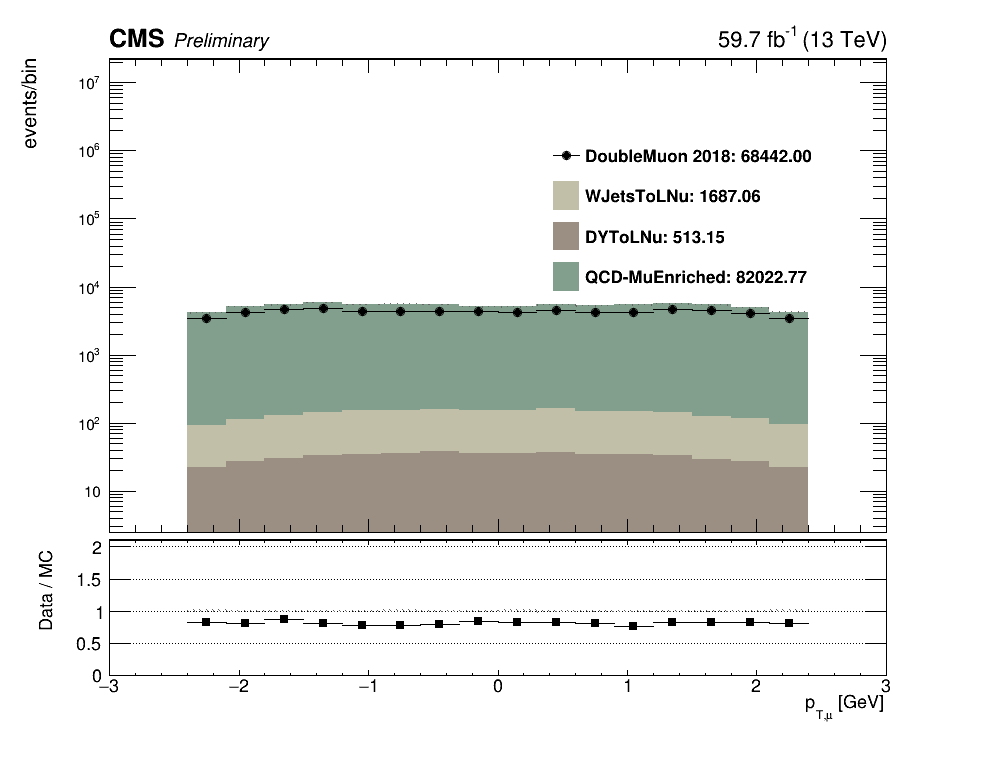

In [244]:
c1 = ROOT.TCanvas("","",1000,800)

def SetHistStyle_dist(hist, color, isData):
    if isData:
        hist.SetMarkerStyle(20)
        hist.SetMarkerColor(color)
    else:
        hist.SetFillColor(color)
        hist.SetFillStyle(4100)
        hist.SetLineColor(color)
        hist.SetLineStyle(0)
        hist.SetLineWidth(0)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('|#eta_{#mu}| [GeV]')
    # Adjust y-axis settings
    # hist.GetYaxis().SetNdivisions(105)
    hist.GetYaxis().SetTitleSize(25)
    hist.GetYaxis().SetTitleFont(43)
    hist.GetYaxis().SetTitleOffset(1.40)
    hist.GetYaxis().SetLabelFont(43)
    hist.GetYaxis().SetLabelSize(25)

    # Adjust x-axis settings
    hist.GetXaxis().SetTitleSize(25)
    hist.GetXaxis().SetTitleFont(43)
    hist.GetXaxis().SetTitleOffset(5.0)
    hist.GetXaxis().SetLabelFont(43)
    hist.GetXaxis().SetLabelSize(25)
    hist.SetStats(0)


SetHistStyle_dist(hist_dist1_WJets, 22, 0)
SetHistStyle_dist(hist_dist2_WJets, 22, 0)
SetHistStyle_dist(hist_dist1_ZJets, 27, 0)
SetHistStyle_dist(hist_dist2_ZJets, 27, 0)
SetHistStyle_dist(hist_dist1_ttbar, 32, 0)
SetHistStyle_dist(hist_dist2_ttbar, 32, 0)
SetHistStyle_dist(hist_dist1_DATA, 1, 1)
SetHistStyle_dist(hist_dist2_DATA, 1, 1)

hist_dist_WJets = hist_dist1_WJets.Clone()
hist_dist_WJets.Add(hist_dist2_WJets)
SetHistStyle_dist(hist_dist_WJets, 22, 0)
hist_dist_ZJets = hist_dist1_ZJets.Clone()
hist_dist_ZJets.Add(hist_dist2_ZJets)
SetHistStyle_dist(hist_dist_ZJets, 27, 0)
hist_dist_ttbar = hist_dist1_ttbar.Clone()
hist_dist_ttbar.Add(hist_dist2_ttbar)
SetHistStyle_dist(hist_dist_ttbar, 32, 0)

hs_dist = ROOT.THStack("",";M_{T,e} [GeV];events/bin")
hs_dist.Add(hist_dist_ZJets)
hs_dist.Add(hist_dist_WJets)
hs_dist.Add(hist_dist_ttbar)

MC_err = ROOT.TH1D("","",xbins,xlow,xup)
# MC_err = ROOT.TH1D("","",8,array('d',ptbins))
MC_err.Sumw2()
MC_err.Add(hist_dist1_WJets)
MC_err.Add(hist_dist2_WJets)
MC_err.Add(hist_dist1_ZJets)
MC_err.Add(hist_dist2_ZJets)
MC_err.Add(hist_dist1_ttbar)
MC_err.Add(hist_dist2_ttbar)
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)

hs_data = ROOT.TH1D("","",xbins,xlow,xup)
# hs_data = ROOT.TH1D("","",8,array('d',ptbins))
hs_data.Add(hist_dist1_DATA)
hs_data.Add(hist_dist2_DATA)
SetHistStyle_dist(hs_data, 1, 1)

legend = ROOT.TLegend(0.55, 0.45, 0.70, 0.75)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
# legend.AddEntry(hist_dist1_DATA,'Double Muon 2018')
legend.AddEntry(hist_dist1_DATA,f'DoubleMuon 2018: {format(hs_data.GetSumOfWeights(), ".2f")}')
legend.AddEntry(hist_dist1_WJets,f'WJetsToLNu: {format(hist_dist_WJets.GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_dist1_ZJets,f'DYToLNu: {format(hist_dist_ZJets.GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_dist1_ttbar,f'QCD-MuEnriched: {format(hist_dist_ttbar.GetSumOfWeights(), ".2f")}','F')

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
# hs_data.GetYaxis().SetMaxDigits(3)
hs_dist.Draw("HIST")
hs_dist.SetMaximum(10000000)
hs_dist.SetMinimum(10)
# hs_dist.GetXaxis().SetRangeUser(10,60)
hs_dist.GetXaxis().SetLabelSize(0)
hs_data.Draw("ep SAME")
MC_err.Draw("e2 SAME")
legend.Draw("SAME")
ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()


# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hs_data, MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
# h3.GetXaxis().SetRangeUser(10,60)
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/MET_TightMuon_dist_MR_2018_new.pdf')
# c1.SaveAs('Fake_Lepton/MET_TightMuon_dist_MR_2018_new.png')
# c1.SaveAs('Fake_Lepton/eta_FakeMuon_dist_MR_2018_new.pdf')
# c1.SaveAs('Fake_Lepton/eta_FakeMuon_dist_MR_2018_new.png')

#### SF
Need to calculate mt distribution in EWK CR first before this part

In [107]:
bin_left = 41
bin_right = 61

WJets_yields = hist_dist1_WJets.Integral(bin_left,bin_right) + hist_dist2_WJets.Integral(bin_left,bin_right)
ZJets_yields = hist_dist1_ZJets.Integral(bin_left,bin_right) + hist_dist2_ZJets.Integral(bin_left,bin_right)
ttbar_yields = hist_dist1_ttbar.Integral(bin_left,bin_right) + hist_dist2_ttbar.Integral(bin_left,bin_right)
data_yields = hist_dist1_DATA.Integral(bin_left,bin_right) + hist_dist2_DATA.Integral(bin_left,bin_right)

print (hist_dist1_WJets.FindBin(80),hist_dist1_WJets.FindBin(120))
print (f"WJets yields in EWK CR: {WJets_yields}")
print (f"ZJets yields in EWK CR: {ZJets_yields}")
print (f"QCD yields in EWK CR: {ttbar_yields}")
print (f"data yields in EWK CR: {data_yields}")
print (f"SF = {data_yields} / {WJets_yields + ZJets_yields + ttbar_yields}  = {data_yields/(WJets_yields+ZJets_yields)}")

41 61
WJets yields in EWK CR: 74504.56840629624
ZJets yields in EWK CR: 2901.190794422255
QCD yields in EWK CR: 4391.856033408049
data yields in EWK CR: 87970.0
SF = 87970.0 / 81797.61523412654  = 1.1364787440671915


#### pt-binned SF
Need to calculate pt-binned histogram in EWK CR first before calculating this part.
For convenient, can just simply set the last bin as [45,200]

1.0064456029986655
0.005266287511828886
1.1394860752481015
0.0076018056871837115


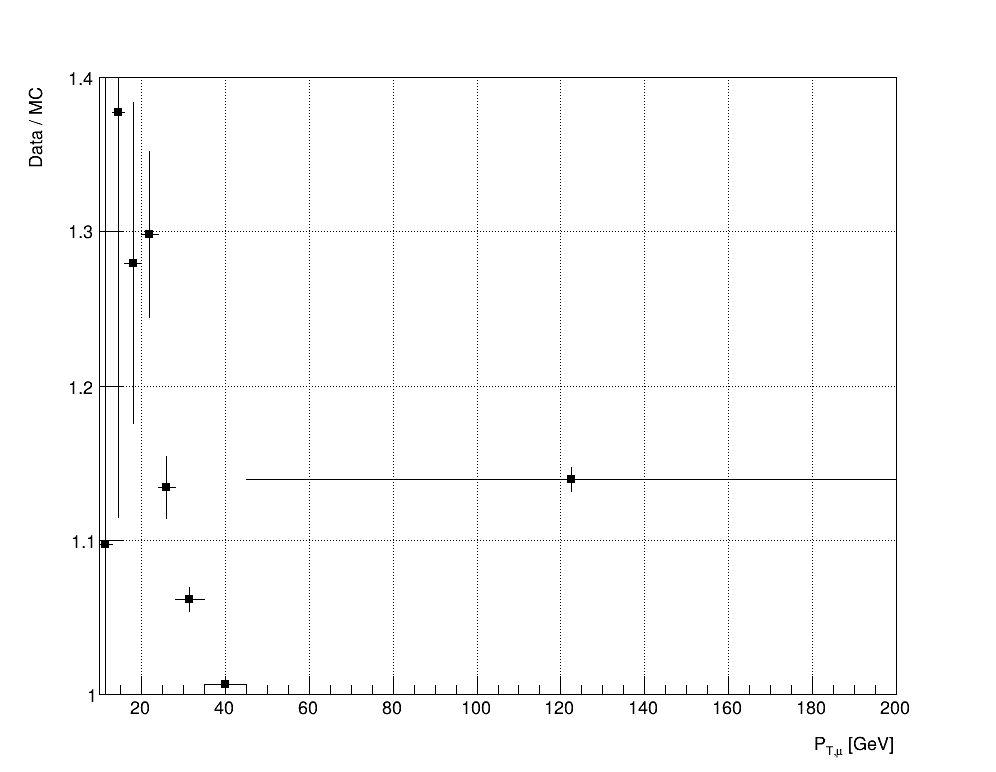

In [15]:
c1 = ROOT.TCanvas("","",1000,800)
c1.Draw()


h3.Draw('ep')
h3.SetXTitle('P_{T,#mu} [GeV]')
h3.GetXaxis().SetTitleOffset(1.6)
h3.GetXaxis().SetRangeUser(10,60)
h3.SetMaximum(1.4)
h3.SetMinimum(1.0)
ROOT.gPad.SetGridy()
ROOT.gPad.SetGridx()

print(h3.GetBinContent(7))
print(h3.GetBinError(7))
print(h3.GetBinContent(8))
print(h3.GetBinError(8))

### <span id="Fake-Rate">Calculating Fake Rate</span>

#### Muon

In [267]:
def AddHist_FR_Mu(file, h_nume_mu, h_deno_mu, isAdd, isData, lumi_Mu8, lumi_Mu17, xsec):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','lepton_gen_matching','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight_lowpt = (1000*lumi_Mu8*xsec*isAdd) / true_events
        weight_highpt = (1000*lumi_Mu17*xsec*isAdd) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
    HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
    HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
#     HLT_cut1 = branches.loc[:,'HLT_IsoMu24'] == True
    met_cut = branches.loc[:,'met'] < 20
    mt_cut = branches.loc[:,'mt'] < 20
    muon_cut = abs(branches.loc[:,'lepton_pdgid']) == 13
    pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.15
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35

#     deno_mu = branches.loc[(HLT_cut1 | HLT_cut2) & muon_cut,:]
#     deno_mu = branches.loc[(HLT_cut1) & muon_cut,:]
        
#     deno_mu = branches.loc[((HLT_cut1 & pt_edge) | (HLT_cut2 & ~pt_edge)) & muon_cut,:]
#     nume_mu_lowpt = deno_mu.loc[pf_cut,:]
#     nume_mu_highpt = deno_mu.loc[pf_cut,:]
    
    overflow_Y = h_deno_mu.GetYaxis().GetBinUpEdge(h_deno_mu.GetNbinsY())
    center_upper_Y = h_deno_mu.GetYaxis().GetBinCenter(h_deno_mu.GetNbinsY())
    
    if isData:
        deno_mu_lowpt = branches.loc[HLT_cut1 & pt_edge & muon_cut & met_cut & mt_cut & jet_pt,:]
        deno_mu_highpt = branches.loc[HLT_cut2 & ~pt_edge & muon_cut & met_cut & mt_cut & jet_pt,:]
        
        
        for i in trange(0, len(deno_mu_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_mu_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y)
                
        for i in trange(0, len(deno_mu_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_mu_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y)
                    
                
    else:
        if isAdd == -1:
            deno_mu_lowpt = branches.loc[HLT_cut1 & pt_edge & muon_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
            deno_mu_highpt = branches.loc[HLT_cut2 & ~pt_edge & muon_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        else:
#             for closure test
            deno_mu_lowpt = branches.loc[HLT_cut1 & pt_edge & muon_cut & met_cut & mt_cut & jet_pt,:].copy()
            deno_mu_highpt = branches.loc[HLT_cut2 & ~pt_edge & muon_cut & met_cut & mt_cut &  jet_pt,:].copy()
        
        # Add SF
        if len(deno_mu_highpt) == 0:
            return False
        deno_mu_highpt.loc[:,'SF'] = 1
#         deno_mu_highpt.loc[(deno_mu_highpt['lepton_pt'] >= 35) & (deno_mu_highpt['lepton_pt'] < 45), 'SF'] = 1
#         deno_mu_highpt.loc[deno_mu_highpt['lepton_pt'] >= 45 , 'SF'] = 1
        
#         print(deno_mu_highpt)
        
        for i in trange(0, len(deno_mu_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_mu_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                
        for i in trange(0, len(deno_mu_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_mu_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]), deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]), deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y, deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y, deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))


    deno_counts = 0
    for i in range(h_deno_mu.GetNbinsX()):
        for j in range(h_deno_mu.GetNbinsY()):
            deno_counts += h_deno_mu.GetBinContent(i+1,j+1) 

    nume_counts = 0
    for i in range(h_nume_mu.GetNbinsX()):
        for j in range(h_nume_mu.GetNbinsY()):
            nume_counts += h_nume_mu.GetBinContent(i+1,j+1) 

    print (f"normalized deno :{deno_counts}")
    print (f"normalized nume :{nume_counts}")
        

In [246]:
# xbins = 5
# xlow = 0
# xup = 2.5

# ybins = 3
# ylow = 25
# yup = 50

ybins = [10, 13, 16, 20, 24, 28, 35, 45, 60]
xbins = [.0, 0.5, 1.0, 1.5, 2.0, 2.5]

from array import array
h_deno_mu = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_mu.StatOverflows(1)
h_deno_mu.Sumw2()
h_nume_mu = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_mu.StatOverflows(1)
h_nume_mu.Sumw2()

# file_DATA = "/eos/user/s/sdeng/ttx/fake_lepton_template/SingleMuon_Run2017B.root"
# file_DATA = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D.root"
# AddDATA(file_DATA, h_nume_mu, h_deno_mu)

file_list_Mu = [
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root',
]
for file_DATA in file_list_Mu:
    AddHist_FR_Mu(file_DATA, h_nume_mu, h_deno_mu, 1, 1, 0, 0, 0)

# file_MC = "/eos/user/s/sdeng/ttx/fake_lepton_template/WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017.root"
file_WJets = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
file_ZJets = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
file_ZJets2 = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
xsec_WJets = 61526.7 
xsec_ZJets = 6077.22 
xsec_ZJets2 = 18610 

# lumi = 14.003 # 2018A
# lumi = 7.055 # 2018B
# lumi = 6.890 # 2018C
# lumi = 31.835 # 2018D

lumi_Mu8 = 0.00856 # HLT_Mu8_TrkIsoVVL 2018 lumi
lumi_Mu17 = 0.04578 # HLT_Mu17_TrkIsoVVL 2018 lumi


AddHist_FR_Mu(file_WJets, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_WJets)
AddHist_FR_Mu(file_ZJets, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_ZJets)
AddHist_FR_Mu(file_ZJets2, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_ZJets2)
print (lumi_Mu8, lumi_Mu17, xsec_WJets)
print (lumi_Mu8, lumi_Mu17, xsec_ZJets)
print (lumi_Mu8, lumi_Mu17, xsec_ZJets2)

is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 4620/4620 [00:00<00:00, 41182.24it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 4749/4749 [00:00<00:00, 41487.54it/s]


normalized deno :9351.0
normalized nume :3707.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root: 100%|██████████| 2453/2453 [00:00<00:00, 41886.69it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018B_0000.root: 100%|██████████| 2265/2265 [00:00<00:00, 41652.67it/s]


normalized deno :14050.0
normalized nume :5485.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root: 100%|██████████| 5503/5503 [00:00<00:00, 41589.94it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018C_0000.root: 100%|██████████| 2073/2073 [00:00<00:00, 41995.91it/s]


normalized deno :21600.0
normalized nume :8358.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 23008/23008 [00:00<00:00, 39726.32it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 6547/6547 [00:00<00:00, 40562.18it/s]


normalized deno :51028.0
normalized nume :19574.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 13394/13394 [00:00<00:00, 41537.50it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 3830/3830 [00:00<00:00, 41502.23it/s]


normalized deno :68163.0
normalized nume :26221.0
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 18415/18415 [00:00<00:00, 26489.24it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 44980/44980 [00:02<00:00, 17824.04it/s]


normalized deno :66476.00905154148
normalized nume :24624.08478984972
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 97253/97253 [00:03<00:00, 26577.76it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 116265/116265 [00:06<00:00, 17469.58it/s]


normalized deno :66096.02393749867
normalized nume :24269.054432150893
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 16854/16854 [00:00<00:00, 26671.03it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 7257/7257 [00:00<00:00, 17657.34it/s]


normalized deno :65962.94719246856
normalized nume :24149.922820095344
0.00856 0.04578 61526.7
0.00856 0.04578 6077.22
0.00856 0.04578 18610


59.7 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: pdf file Fake_Lepton/FR_Muon_data_2018_new.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/FR_Muon_data_2018_new.png has been created


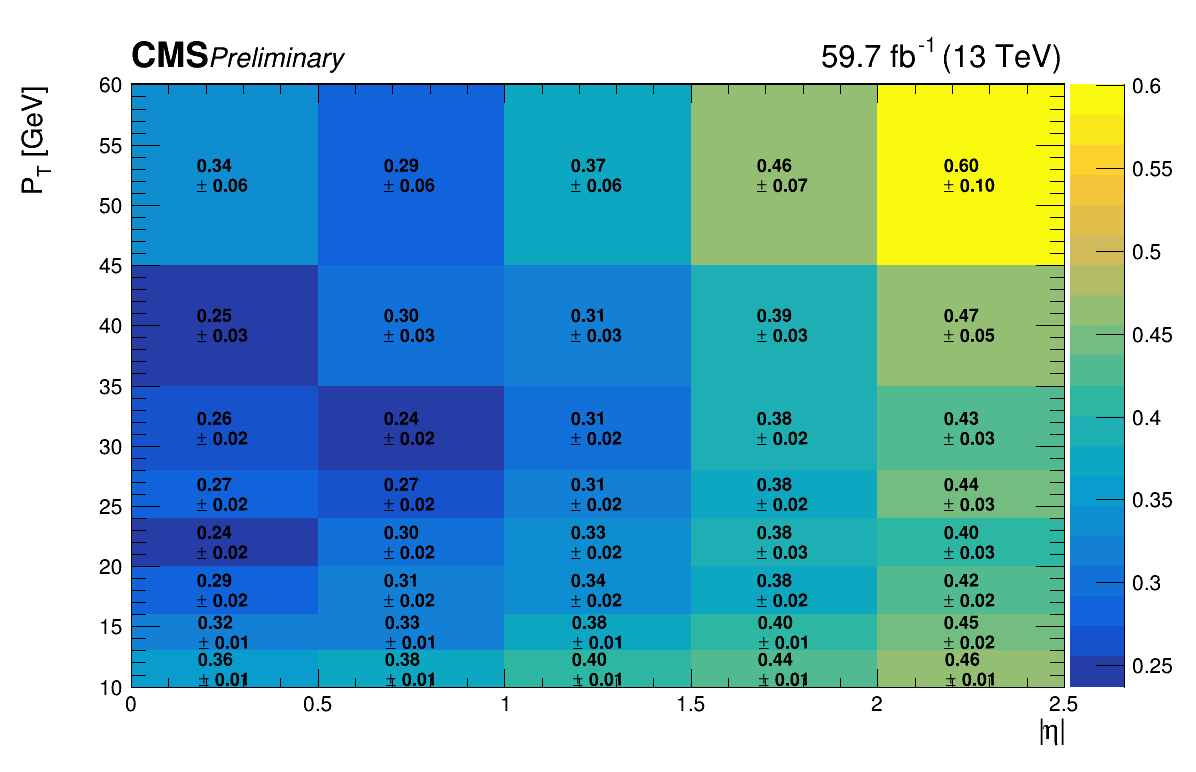

In [251]:
fake_rate_mu = h_nume_mu.Clone("fake_rate_mu")
fake_rate_mu.Divide(h_deno_mu)

fake_rate_mu.SetDirectory(0)
c1 = ROOT.TCanvas("","",1200,800)
fake_rate_mu.SetStats(0)
fake_rate_mu.SetXTitle("|#eta|")
fake_rate_mu.SetYTitle("P_{T} [GeV]")
fake_rate_mu.SetMarkerSize(1.3)
ROOT.gStyle.SetPaintTextFormat('4.2f')
fake_rate_mu.Draw("TEXT COLZe")
c1.Draw()
CMS_lumi(c1,0,0)
c1.SaveAs('Fake_Lepton/FR_Muon_data_2018_new.pdf')
c1.SaveAs('Fake_Lepton/FR_Muon_data_2018_new.png')

In [248]:
f = ROOT.TFile("Fake_Lepton/Mu_Fake_Rate_2D_2018.root","RECREATE")
f.cd()
fake_rate_mu.Write()
f.Close()

#### Electron 

In [268]:
def AddHist_FR_Ele(file, h_nume_e, h_deno_e, isAdd, isData, lumi_Ele8, lumi_Ele23, xsec):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['jet_pt','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['jet_pt','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_gen_matching','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight_lowpt = (1000*lumi_Ele8*xsec*isAdd) / true_events
        weight_highpt = (1000*lumi_Ele23*xsec*isAdd) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
    HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    met_cut = branches.loc[:,'met'] < 20
    mt_cut = branches.loc[:,'mt'] < 20
    Electron_cut = abs(branches.loc[:,'lepton_pdgid']) == 11
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35

#     deno_e = branches.loc[(HLT_cut1 | HLT_cut2) & muon_cut,:]
#     deno_e = branches.loc[(HLT_cut1) & muon_cut,:]
        
#     deno_e = branches.loc[((HLT_cut1 & pt_edge) | (HLT_cut2 & ~pt_edge)) & muon_cut,:]
#     nume_e_lowpt = deno_e.loc[pf_cut,:]
#     nume_e_highpt = deno_e.loc[pf_cut,:]
    
    overflow_Y = h_deno_e.GetYaxis().GetBinUpEdge(h_deno_e.GetNbinsY())
    center_upper_Y = h_deno_e.GetYaxis().GetBinCenter(h_deno_e.GetNbinsY())
    
    if isData:
        deno_e_lowpt = branches.loc[HLT_cut1 & pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:]
        deno_e_highpt = branches.loc[HLT_cut2 & ~pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:]
        
        
        for i in trange(0, len(deno_e_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_e_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y)
                
        for i in trange(0, len(deno_e_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_e_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y)
                    
                
    else:
        if isAdd == -1:
            deno_e_lowpt = branches.loc[HLT_cut1 & pt_edge & Electron_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
            deno_e_highpt = branches.loc[HLT_cut2 & ~pt_edge & Electron_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        else:
#             for closure test
            deno_e_lowpt = branches.loc[HLT_cut1 & pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:].copy()
            deno_e_highpt = branches.loc[HLT_cut2 & ~pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:].copy()
        
        # Add SF
        if len(deno_e_highpt) == 0:
            return False
        deno_e_highpt.loc[:,'SF'] = 1
#         deno_e_highpt.loc[(deno_e_highpt['lepton_pt'] >= 35) & (deno_e_highpt['lepton_pt'] < 45), 'SF'] = 1
#         deno_e_highpt.loc[deno_e_highpt['lepton_pt'] >= 45 , 'SF'] = 1
        
#         print(deno_e_highpt)
        
        for i in trange(0, len(deno_e_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_e_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                
        for i in trange(0, len(deno_e_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_e_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]), deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]), deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y, deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y, deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))


    deno_counts = 0
    for i in range(h_deno_e.GetNbinsX()):
        for j in range(h_deno_e.GetNbinsY()):
            deno_counts += h_deno_e.GetBinContent(i+1,j+1) 

    nume_counts = 0
    for i in range(h_nume_e.GetNbinsX()):
        for j in range(h_nume_e.GetNbinsY()):
            nume_counts += h_nume_e.GetBinContent(i+1,j+1) 

    print (f"normalized deno :{deno_counts}")
    print (f"normalized nume :{nume_counts}")
        

In [253]:
# xbins = 5
# xlow = 0
# xup = 2.5

# ybins = 3
# ylow = 25
# yup = 50

ybins = [10, 13, 16, 20, 24, 28, 35, 45, 60]
xbins = [.0, 0.5, 1.0, 1.5, 2.0, 2.5]

from array import array
h_deno_e = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_e.StatOverflows(1)
h_deno_e.Sumw2()
h_nume_e = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_e.StatOverflows(1)
h_nume_e.Sumw2()

# file_DATA = "/eos/user/s/sdeng/ttx/fake_lepton_template/SingleMuon_Run2017B.root"
# file_DATA = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D.root"
# AddDATA(file_DATA, h_nume_e, h_deno_e)

file_list_E = [
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018A_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018B_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0001.root',
]
for file_DATA in file_list_E:
    AddHist_FR_Ele(file_DATA, h_nume_e, h_deno_e, 1, 1, 0, 0, 0)



is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018A_0000.root: 100%|██████████| 1574/1574 [00:00<00:00, 40049.23it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018A_0000.root: 100%|██████████| 3492/3492 [00:00<00:00, 42135.13it/s]


normalized deno :5057.0
normalized nume :1961.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018B_0000.root: 100%|██████████| 3845/3845 [00:00<00:00, 41718.98it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018B_0000.root: 100%|██████████| 3763/3763 [00:00<00:00, 42669.78it/s]


normalized deno :12657.0
normalized nume :4867.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018C_0000.root: 100%|██████████| 3619/3619 [00:00<00:00, 41692.47it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018C_0000.root: 100%|██████████| 3771/3771 [00:00<00:00, 43357.83it/s]


normalized deno :20038.0
normalized nume :7768.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0000.root: 100%|██████████| 11588/11588 [00:00<00:00, 38845.71it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0000.root: 100%|██████████| 11593/11593 [00:00<00:00, 42525.96it/s]


normalized deno :43184.0
normalized nume :16768.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0001.root: 100%|██████████| 6446/6446 [00:00<00:00, 42086.42it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/EGamma_Run2018D_0001.root: 100%|██████████| 6844/6844 [00:00<00:00, 43068.52it/s]


normalized deno :56457.0
normalized nume :21817.0


In [254]:
# file_MC = "/eos/user/s/sdeng/ttx/fake_lepton_template/WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017.root"
file_WJets = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
file_ZJets = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
file_ZJets2 = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root"
xsec_WJets = 61526.7 
xsec_ZJets = 6077.22 
xsec_ZJets2 = 18610 


lumi_Ele8 = 0.00461 # HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30 2018 lumi
lumi_Ele23 = 0.03891 # HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30 2018 lumi


AddHist_FR_Ele(file_WJets, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_WJets)
AddHist_FR_Ele(file_ZJets, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_ZJets)
AddHist_FR_Ele(file_ZJets2, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_ZJets)
print (lumi_Ele8, lumi_Ele23, xsec_WJets)
print (lumi_Ele8, lumi_Ele23, xsec_ZJets)

is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 9509/9509 [00:00<00:00, 26708.84it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 32802/32802 [00:01<00:00, 17988.71it/s]


normalized deno :55452.86868059131
normalized nume :20842.385599113797
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 81214/81214 [00:03<00:00, 25714.91it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 269664/269664 [00:15<00:00, 17553.43it/s]


normalized deno :54782.376960396614
normalized nume :20194.75902321151
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 9746/9746 [00:00<00:00, 26837.70it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2018_0000.root: 100%|██████████| 5660/5660 [00:00<00:00, 17632.38it/s]


normalized deno :54758.212784235555
normalized nume :20171.925403905712
0.00461 0.03891 61526.7
0.00461 0.03891 6077.22


59.7 fb^{-1} (13 TeV)


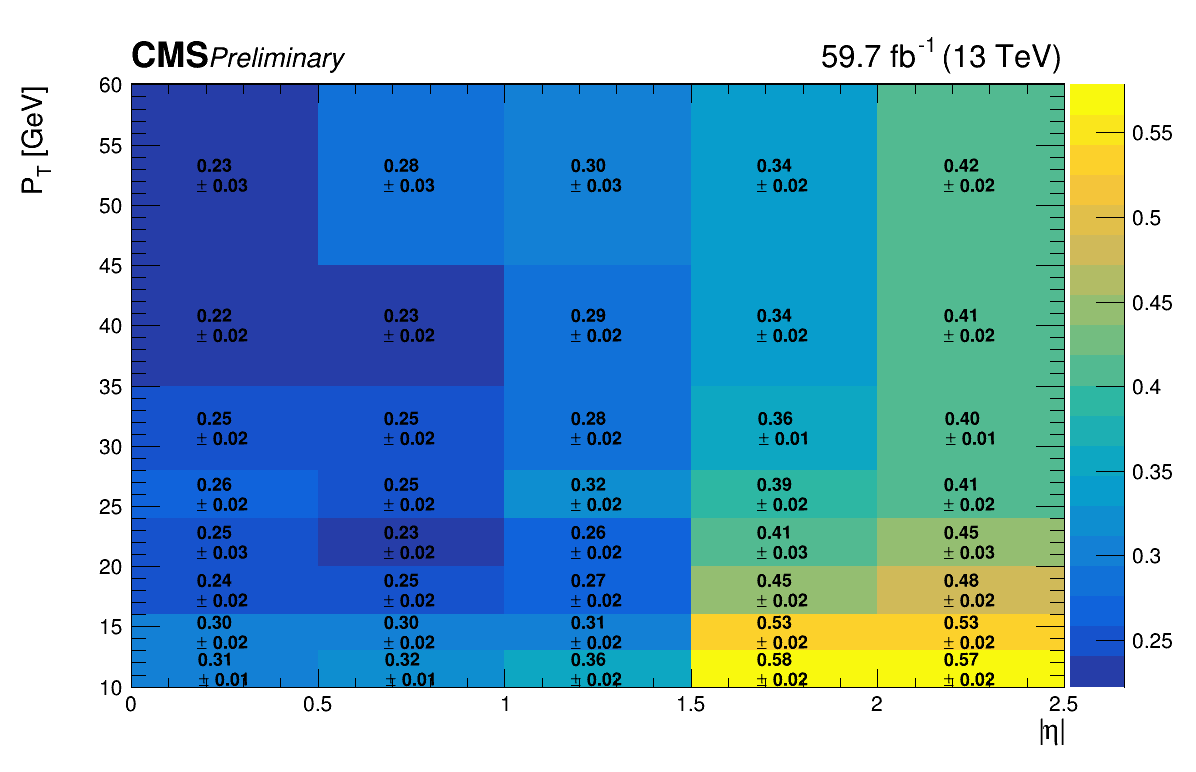

In [257]:
fake_rate_e = h_nume_e.Clone("fake_rate_e")
fake_rate_e.Divide(h_deno_e)

fake_rate_e.SetDirectory(0)
c1 = ROOT.TCanvas("","",1200,800)
fake_rate_e.SetStats(0)
fake_rate_e.SetXTitle("|#eta|")
fake_rate_e.SetYTitle("P_{T} [GeV]")
fake_rate_e.SetMarkerSize(1.3)
ROOT.gStyle.SetPaintTextFormat('4.2f')
fake_rate_e.Draw("COLZe TEXT")
c1.Draw()
CMS_lumi(c1,0,0)
# c1.SaveAs('Fake_Lepton/FR_Electron_data_2018_new.pdf')
# c1.SaveAs('Fake_Lepton/FR_Electron_data_2018_new.png')

In [258]:
f = ROOT.TFile("Fake_Lepton/Ele_Fake_Rate_2D_2018.root","RECREATE")
f.cd()
fake_rate_e.Write()
f.Close()

#### test

In [69]:
h_deno_mu_1075 = h_deno_mu.Clone()
h_nume_mu_1075 = h_nume_mu.Clone()

In [74]:
h_deno_mu_diff = h_deno_mu.Clone()
h_nume_mu_diff = h_nume_mu.Clone()

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


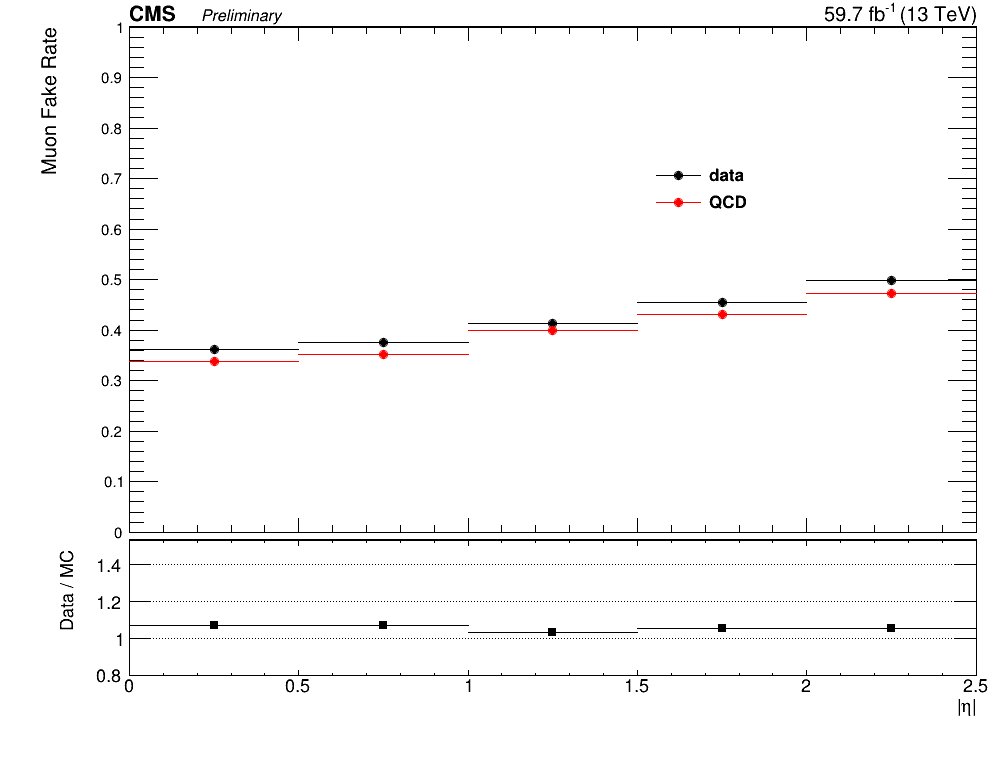

In [82]:
TH1D_data_deno = h_deno_mu_1075.ProjectionX("TH1D_data_deno",1,8)
TH1D_data = h_nume_mu_1075.ProjectionX("TH1D_data",1,8)
TH1D_data.Divide(TH1D_data_deno)

TH1D_QCD_deno = h_deno_mu_valid.ProjectionX("TH1D_QCD_deno",1,8)
TH1D_QCD = h_nume_mu_valid.ProjectionX("TH1D_QCD",1,8)
TH1D_QCD.Divide(TH1D_QCD_deno)

c1 = ROOT.TCanvas("c1","",1000,800)
TH1D_data.SetStats(0)
TH1D_data.SetMarkerStyle(20)
TH1D_data.SetMarkerColor(1)
TH1D_data.SetLineColor(1)
TH1D_data.GetXaxis().SetTitle("|#eta|")
TH1D_data.GetYaxis().SetTitle("Muon Fake Rate")

TH1D_QCD.SetStats(0)
TH1D_QCD.SetMarkerStyle(20)
TH1D_QCD.SetMarkerColor(2)
TH1D_QCD.SetLineColor(2)

h1 = TH1D_data.Clone("h1")
h2 = TH1D_QCD.Clone("h2")
h3 = createRatio(h1, h2)

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

h1.SetMaximum(1)
h1.SetMinimum(0)
# CMS_lumi(c1, 0, 0)


# Upper histogram plot is pad1
legend = ROOT.TLegend(0.65, 0.60, 0.90, 0.7)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(h1,'data')
legend.AddEntry(h2,'QCD')

# draw everything
pad1.cd()
h1.Draw("ep")
h2.Draw("ep same")
legend.Draw("same")
# to avoid clipping the bottom zero, redraw a small axis
h1.GetXaxis().SetLabelSize(0)
# axis = TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
# axis.SetLabelFont(43)
# axis.SetLabelSize(15)
# axis.Draw()
pad2.cd()
h3.Draw("ep")

CMS_lumi(pad1, 0, 0)

# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf')
# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png')

### <span id="Apply-Weight">Apply weight</span>

Has been abandoned, moved to NanoAOD-tools to interface with coffea framework

### <span id="Closure-Test">Closure test</span>

Noticed that the ApplyWeightMC and AddHist_FR modules need to be changed before running this part

#### Muon

In [269]:
from array import array
h_deno_mu_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_mu_valid.Sumw2()
h_nume_mu_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_mu_valid.Sumw2()

file_list_QCD = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root"
]

xsec_list_QCD = [
    2799000,
    2526000,
    1362000,
    376600,
    88930,
    21230,
    7055,
    619.3,
    59.24,
    18.21,
    3.275,
    1.078
]

lumi_Mu8 = 0.00856 # HLT_Mu8_TrkIsoVVL 2018 lumi
lumi_Mu17 = 0.04578 # HLT_Mu17_TrkIsoVVL 2018 lumi

for i in range(0,len(file_list_QCD)):
    print ("test",i)
    AddHist_FR_Mu(file_list_QCD[i], h_nume_mu_valid, h_deno_mu_valid, 1, 0, lumi_Mu8, lumi_Mu17, xsec_list_QCD[i])
#     AddMC(file_list_QCD[i], h_nume_mu_valid, h_deno_mu_valid, 59.783, xseclist_QCD[i], 1)


test 0
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 328/328 [00:00<00:00, 28498.99it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 2263.52it/s]


normalized deno :2017.5791385336047
normalized nume :1104.2289711075734
test 1
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 15639/15639 [00:00<00:00, 31738.62it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 84/84 [00:00<00:00, 20312.57it/s]


normalized deno :14692.231310518464
normalized nume :6494.468780496549
test 2
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 75330/75330 [00:02<00:00, 31860.44it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 4273/4273 [00:00<00:00, 23185.96it/s]


normalized deno :53998.708987603044
normalized nume :20615.15940409874
test 3
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 59791/59791 [00:01<00:00, 32708.68it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 15206/15206 [00:00<00:00, 23859.09it/s]


normalized deno :76623.73923544942
normalized nume :27787.139484898133
test 4
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 44757/44757 [00:01<00:00, 31289.86it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 19163/19163 [00:00<00:00, 21681.09it/s]


normalized deno :81020.03666462963
normalized nume :29092.48005768404
test 5
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 22680/22680 [00:00<00:00, 32677.21it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 10233/10233 [00:00<00:00, 25249.62it/s]


normalized deno :81685.23095564236
normalized nume :29290.669705557815
test 6
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 25867/25867 [00:00<00:00, 27915.06it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 10215/10215 [00:00<00:00, 25613.09it/s]


normalized deno :81817.34476964235
normalized nume :29329.592690849266
test 7
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 13211/13211 [00:00<00:00, 32315.04it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 4571/4571 [00:00<00:00, 25417.60it/s]


normalized deno :81823.41801314932
normalized nume :29331.3737962733
test 8
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 5587/5587 [00:00<00:00, 32895.05it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1682/1682 [00:00<00:00, 25380.33it/s]


normalized deno :81823.77529539129
normalized nume :29331.48401021875
test 9
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 3410/3410 [00:00<00:00, 32162.96it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1037/1037 [00:00<00:00, 24761.15it/s]


normalized deno :81823.85695824317
normalized nume :29331.509510792435
test 10
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 2561/2561 [00:00<00:00, 32516.05it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 757/757 [00:00<00:00, 23494.28it/s]


normalized deno :81823.8683278807
normalized nume :29331.513457169327
test 11
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1671/1671 [00:00<00:00, 30988.42it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 416/416 [00:00<00:00, 21901.82it/s]

normalized deno :81823.87088030319
normalized nume :29331.514298463313


59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file Fake_Lepton/2018/FR_Muon_QCD_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/2018/FR_Muon_QCD_2018.png has been created


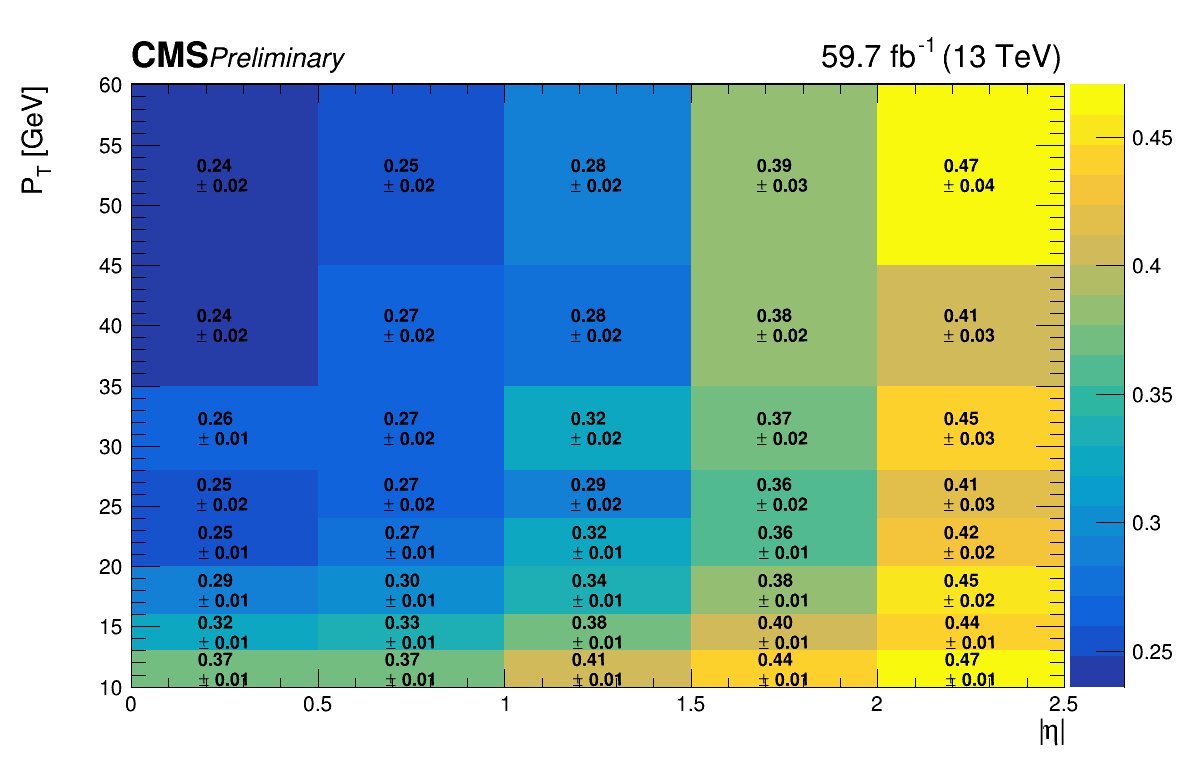

In [277]:
# default = ROOT.TStyle("Default","Default Style")
# ROOT.gROOT.SetStyle('Default')

fake_rate_mu_valid = h_nume_mu_valid.Clone("fake_rate_mu_valid")
fake_rate_mu_valid.Divide(h_deno_mu_valid)

fake_rate_mu_valid.SetDirectory(0)
c1 = ROOT.TCanvas("c1","",1200,800)
fake_rate_mu_valid.SetStats(0)
fake_rate_mu_valid.SetXTitle("|#eta|")
fake_rate_mu_valid.SetYTitle("P_{T} [GeV]")
fake_rate_mu_valid.SetMarkerSize(1.3)
fake_rate_mu_valid.Draw("TEXT COLZe")
ROOT.gStyle.SetPaintTextFormat('4.2f')
c1.Draw()
CMS_lumi(c1, 0, 0)
c1.SaveAs('Fake_Lepton/2018/FR_Muon_QCD_2018.pdf')
c1.SaveAs('Fake_Lepton/2018/FR_Muon_QCD_2018.png')

In [278]:
f = ROOT.TFile("Fake_Lepton/Mu_Fake_Rate_2D_2018_Closure.root","RECREATE")
f.cd()
fake_rate_mu.Write()
f.Close()

#### Electron

In [273]:
from array import array
h_deno_e_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_e_valid.Sumw2()
h_nume_e_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_e_valid.Sumw2()


file_list_QCD = [
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300toInf_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root",
]

xsec_list_QCD = [
    1327000,
    4908000,
    6396000,
    1989000,
    366500,
    66490,
    16480,
    1097
]
lumi_Ele8 = 0.00641 # HLT_Mu8_TrkIsoVVL 2018 lumi
lumi_Ele23 = 0.03891 # HLT_Mu17_TrkIsoVVL 2018 lumi

for i in range(0,len(file_list_QCD)):
    print ("test",i)
    AddHist_FR_Ele(file_list_QCD[i], h_nume_e_valid, h_deno_e_valid, 1, 0, lumi_Ele8, lumi_Ele23, xsec_list_QCD[i])
#     AddMC(file_list_QCD[i], h_nume_mu_valid, h_deno_mu_valid, 59.783, xseclist_QCD[i], 1)


test 0
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 130/130 [00:00<00:00, 28342.84it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 5/5 [00:00<00:00, 8305.55it/s]


normalized deno :95.9135022767518
normalized nume :48.53390248495538
test 1
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 640/640 [00:00<00:00, 30435.89it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 57/57 [00:00<00:00, 17837.45it/s]


normalized deno :2268.4716492388766
normalized nume :1018.2646793713723
test 2
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1496/1496 [00:00<00:00, 32128.41it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 692/692 [00:00<00:00, 22457.90it/s]


normalized deno :18534.244154933975
normalized nume :6725.843369725362
test 3
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 949/949 [00:00<00:00, 31881.92it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-50to80_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1367/1367 [00:00<00:00, 23419.33it/s]


normalized deno :29641.029537262286
normalized nume :10184.761549526382
test 4
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 530/530 [00:00<00:00, 32062.84it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-80to120_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1192/1192 [00:00<00:00, 25175.92it/s]


normalized deno :31823.965368531404
normalized nume :10822.081001298955
test 5
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 615/615 [00:00<00:00, 32058.57it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-120to170_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 1422/1422 [00:00<00:00, 25131.68it/s]


normalized deno :32230.489820642393
normalized nume :10955.579923417841
test 6
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 188/188 [00:00<00:00, 28001.75it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-170to300_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 506/506 [00:00<00:00, 21111.29it/s]


normalized deno :32323.646073511856
normalized nume :10985.681014831625
test 7
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300toInf_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 110/110 [00:00<00:00, 25658.94it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2018/QCD_Pt-300toInf_EMEnriched_TuneCP5_13TeV_pythia8_2018_0000.root: 100%|██████████| 338/338 [00:00<00:00, 22582.71it/s]

normalized deno :32329.120095192215
normalized nume :10987.939518681611


59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file Fake_Lepton/FR_Ele_QCD_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/FR_Ele_QCD_2018.png has been created


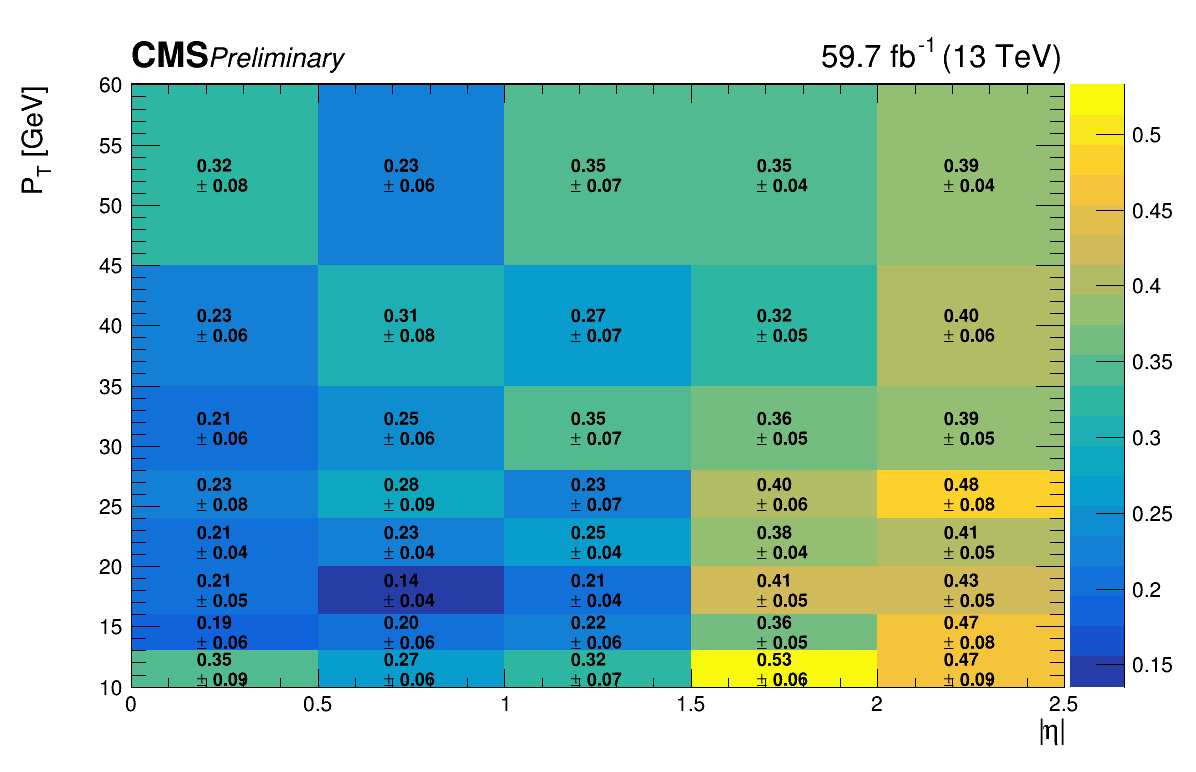

In [275]:
# default = ROOT.TStyle("Default","Default Style")
# ROOT.gROOT.SetStyle('Default')

fake_rate_e_valid = h_nume_e_valid.Clone("fake_rate_e_valid")
fake_rate_e_valid.Divide(h_deno_e_valid)

fake_rate_e_valid.SetDirectory(0)
c1 = ROOT.TCanvas("c1","",1200,800)
fake_rate_e_valid.SetStats(0)
fake_rate_e_valid.SetXTitle("|#eta|")
fake_rate_e_valid.SetYTitle("P_{T} [GeV]")
fake_rate_e_valid.SetMarkerSize(1.3)
fake_rate_e_valid.Draw("TEXT COLZe")
ROOT.gStyle.SetPaintTextFormat('4.2f')
c1.Draw()
CMS_lumi(c1, 0, 0)
c1.SaveAs('Fake_Lepton/FR_Ele_QCD_2018.pdf')
c1.SaveAs('Fake_Lepton/FR_Ele_QCD_2018.png')

In [276]:
f = ROOT.TFile("Fake_Lepton/Ele_Fake_Rate_2D_2018_Closure.root","RECREATE")
f.cd()
fake_rate_e_valid.Write()
f.Close()

#### FR 2D Data vs. QCD

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file Fake_Lepton/2d_FR_Muon_datavsQCD_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/2d_FR_Muon_datavsQCD_2018.png has been created


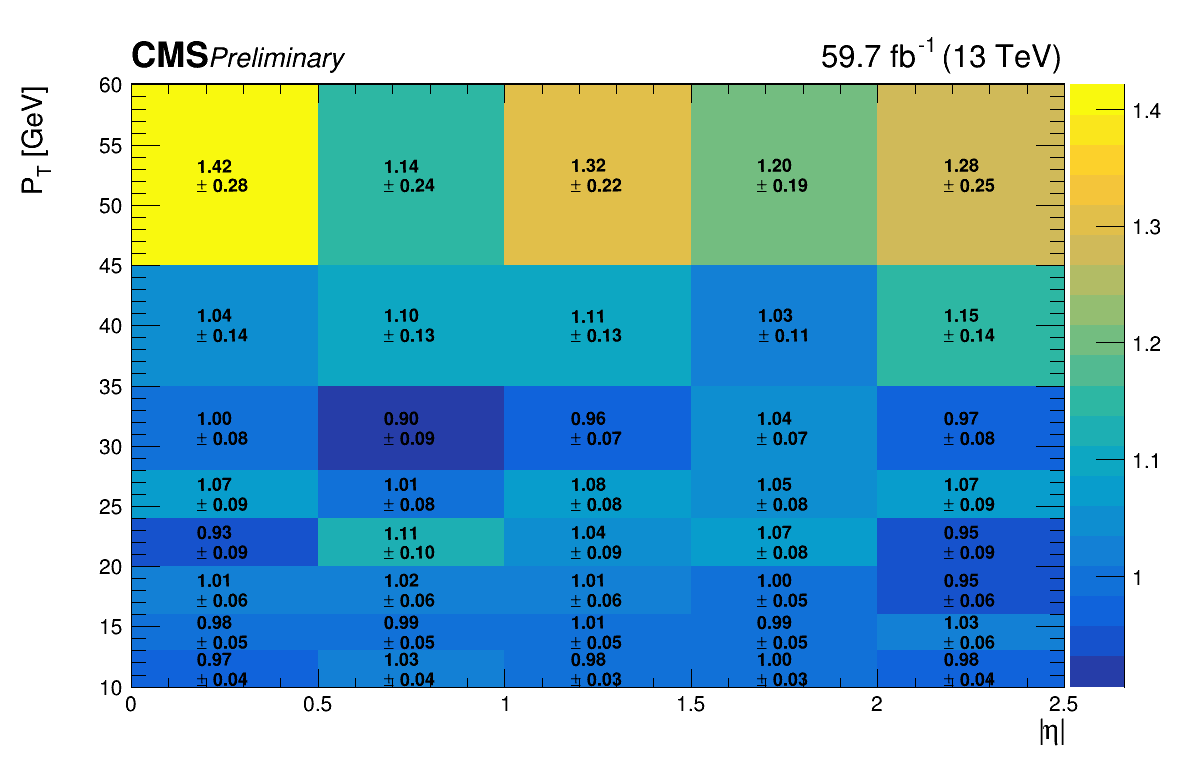

In [279]:
TH2D_ratio_mu_Data_QCD = fake_rate_mu.Clone("TH2D_ratio_mu_Data_QCD")
TH2D_ratio_mu_Data_QCD.Divide(fake_rate_mu_valid)

c1 = ROOT.TCanvas("c1","",1200,800)
TH2D_ratio_mu_Data_QCD.SetStats(0)
TH2D_ratio_mu_Data_QCD.SetXTitle("|#eta|")
TH2D_ratio_mu_Data_QCD.SetYTitle("P_{T} [GeV]")
TH2D_ratio_mu_Data_QCD.SetMarkerSize(1.3)
TH2D_ratio_mu_Data_QCD.Draw("TEXT COLZe")
ROOT.gStyle.SetPaintTextFormat('4.2f')
c1.Draw()
CMS_lumi(c1, 0, 0)
c1.SaveAs('Fake_Lepton/2d_FR_Muon_datavsQCD_2018.pdf')
c1.SaveAs('Fake_Lepton/2d_FR_Muon_datavsQCD_2018.png')

#### FR 1D Data vs. QCD

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png has been created


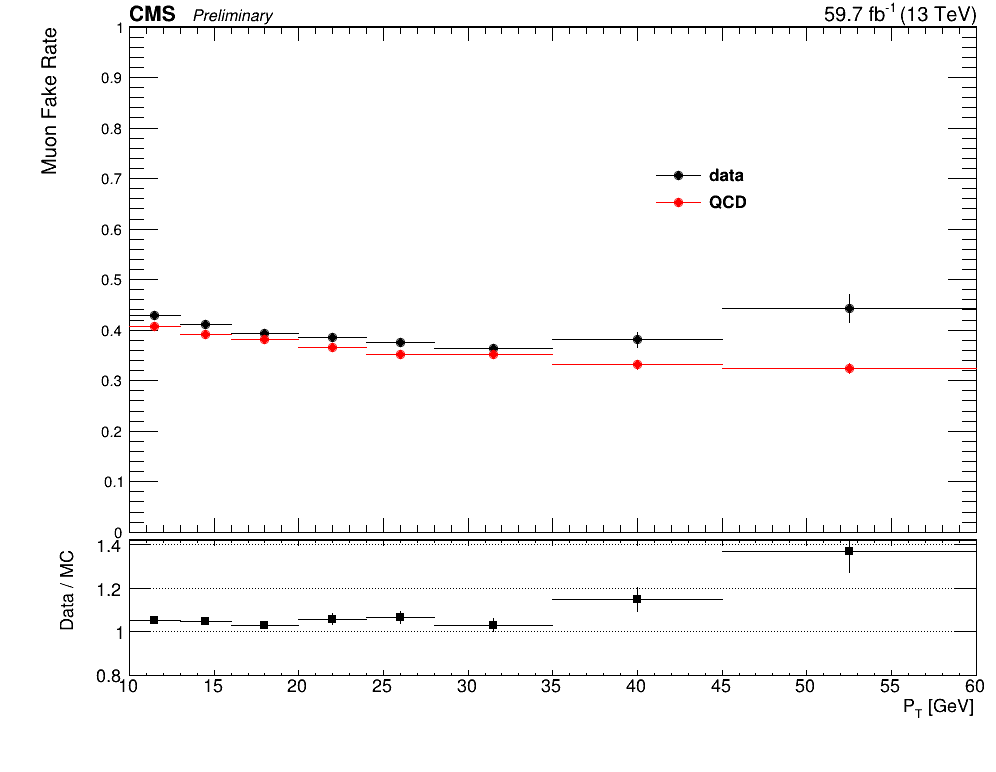

In [61]:
TH1D_data_deno = h_deno_mu.ProjectionY("TH1D_data_deno",1,5)
TH1D_data = h_nume_mu.ProjectionY("TH1D_data",1,5)
TH1D_data.Divide(TH1D_data_deno)

TH1D_QCD_deno = h_deno_mu_valid.ProjectionY("TH1D_QCD_deno",1,5)
TH1D_QCD = h_nume_mu_valid.ProjectionY("TH1D_QCD",1,5)
TH1D_QCD.Divide(TH1D_QCD_deno)

c1 = ROOT.TCanvas("c1","",1000,800)
TH1D_data.SetStats(0)
TH1D_data.SetMarkerStyle(20)
TH1D_data.SetMarkerColor(1)
TH1D_data.SetLineColor(1)
TH1D_data.GetXaxis().SetTitle("P_{T} [GeV]")
TH1D_data.GetYaxis().SetTitle("Muon Fake Rate")

TH1D_QCD.SetStats(0)
TH1D_QCD.SetMarkerStyle(20)
TH1D_QCD.SetMarkerColor(2)
TH1D_QCD.SetLineColor(2)

h1 = TH1D_data.Clone("h1")
h2 = TH1D_QCD.Clone("h2")
h3 = createRatio(h1, h2)

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

TH1D_data.SetMaximum(1)
TH1D_data.SetMinimum(0)
# CMS_lumi(c1, 0, 0)


# Upper histogram plot is pad1
legend = ROOT.TLegend(0.65, 0.60, 0.90, 0.7)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(h1,'data')
legend.AddEntry(h2,'QCD')

# draw everything
pad1.cd()
h1.Draw("ep")
h2.Draw("ep same")
legend.Draw("same")
# to avoid clipping the bottom zero, redraw a small axis
h1.GetXaxis().SetLabelSize(0)
# axis = TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
# axis.SetLabelFont(43)
# axis.SetLabelSize(15)
# axis.Draw()
pad2.cd()
h3.Draw("ep")

CMS_lumi(pad1, 0, 0)

# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf')
# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png')

### test 

In [ ]:
# ntuple = uproot.open("/eos/cms/store/group/phys_top/efe/ntuples_a02ce4df_all/MC13TeV_2017_t_sch/Chunk_0_ext0.root:analysis")
# ntuple['data']

In [ ]:
# ttc_array = ntuple['data'].arrays(['l_id','l_isPromptFinalState'],library='pd')
# ttc_array

In [ ]:
# aktest = Events.arrays(["lepton_pt","lepton_eta","lepton_pdgid"],"abs(lepton_pdgid) == 13", library='ak')

In [ ]:
# plt.style.use(hep.style.CMS)
# plt.hist(branches['lepton_pt'], bins=10, range=(0,100))
# plt.yscale('log')
# plt.xlabel('test')
# plt.show()

In [ ]:
# plt.style.use(hep.style.CMS)
# plt.hist(branches['lepton_pt'], bins=10, range=(0,100), histtype='step')
# plt.yscale('log')
# plt.show()

In [ ]:
# test_mu = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/test.root:Events").arrays(['event','Muon_pt','Muon_eta','Muon_phi'],library='pd')
# test_mu[test_mu['event'].isin([12626214])]

In [ ]:
# test_e = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/test.root:Events").arrays(['event','Electron_pt','Electron_eta','Electron_phi','Electron_mass','Electron_pdgId','Electron_cutBased','photon_pt','photon_eta','photon_phi','MET','dilepton_mass'],library='pd')
# test_e[test_e['event'].isin([12626214])]

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([12626214])]

In [ ]:
# test_mu = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Muon_pt','Muon_eta','Muon_phi','Muon_tightId'],library='pd')
# test_mu[test_mu['event'].isin([3288579])]

In [ ]:
# test_e = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Electron_pt','Electron_eta','Electron_deltaEtaSC','Electron_phi','Electron_pdgId','Electron_charge','Electron_cutBased','Electron_dxy','Electron_dz','MET_pt','Electron_mass'],library='pd')
# test_e[test_e['event'].isin([3288579])]

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([3288579])]

In [ ]:
# import math
# def deltaR(eta1,eta2,phi1,phi2):
#     return math.sqrt((eta1-eta2)*(eta1-eta2)+(phi1-phi2)*(phi1-phi2))


# deltaR(1.394043,2.005371,2.279785,2.589355)

# pt1 = 35.215302
# eta1 = 0.629272
# phi1 = -2.131348
# M1 = 0.012650

# pt2 = 32.196800 
# eta2 = 1.826904 
# phi2 = 1.805176
# M2 = -0.021729 

# a=ROOT.TLorentzVector()
# a.SetPtEtaPhiM(pt1,eta1, phi1, M1)

# b=ROOT.TLorentzVector()
# b.SetPtEtaPhiM(pt2, eta2, phi2, M2)

# (a+b).M()

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/tree_10.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([6092807])]

In [ ]:
# true_events = uproot.open(file_DATA)
# true_events.keys()
# true_events['nEventsGenWeighted'].values()[0]
# true_events = uproot.open(file_DATA)['nEventsGenWeighted'].values()[0]
# true_events

2.0
1.4142135623730951


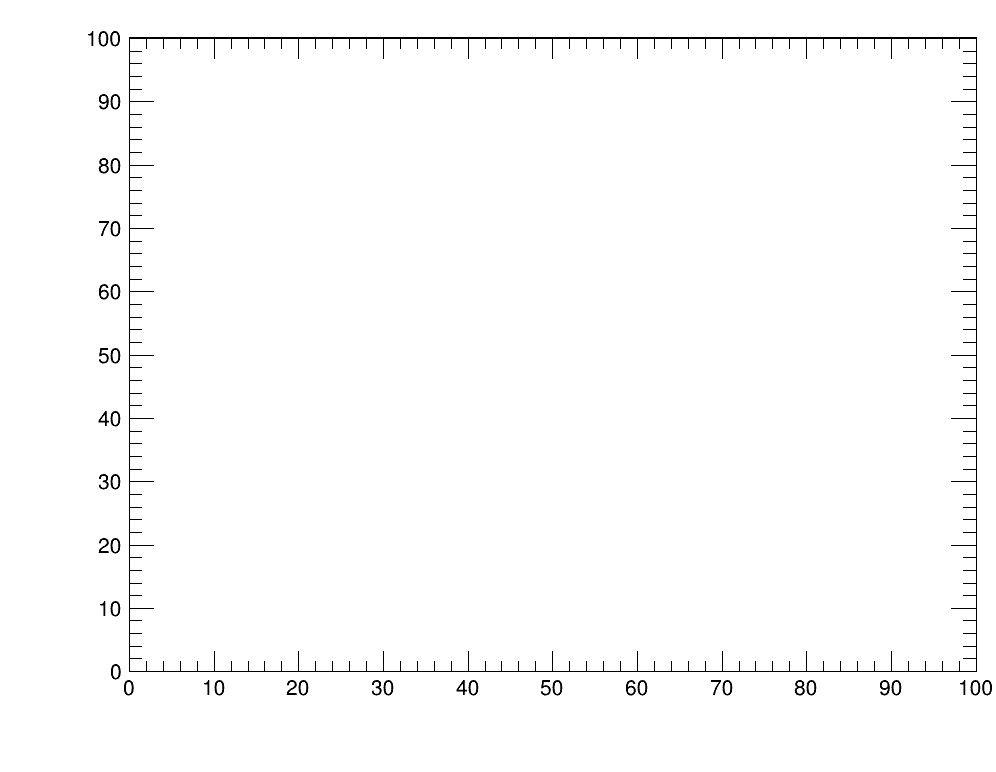

In [320]:
h_test = ROOT.TH2D("","",5,0,100, 5,0,100)

# h_test.Fill(1,1,3)
h_test.Fill(1,100,1)
h_test.Fill(1,100,1)
print(h_test.GetBinContent(1,6))
print(h_test.GetBinError(1,6))
# h_test.Fill(1,1,1)
# h_test.Fill(1,1,1)

c2 = ROOT.TCanvas("","",1000,800)
c2.Draw()
h_test.Draw("TEXT HIST e")

In [ ]:
h_test_2 = ROOT.TH2D("","",5,0,100, 5,0,100)
h_test_3 = ROOT.TH2D("","",5,0,100, 5,0,100)

h_test_2.Fill(1,1,2)
# h_test_2.Fill(1,1,1)
h_test_3.Fill(1,1,1)

h_test_2.Add(h_test_3, -1)

c2 = ROOT.TCanvas("","",1000,800)
c2.Draw()
h_test_2.Draw("TEXT e")

### Final test